### pre-processing

In [29]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [30]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

* loading the pre-processed datasets

In [31]:
train_df.head()

,Unnamed: 0,online_order,book_table,votes,location,cuisines,approx_cost(for two people),listed_in(type),type,rate
0,8615,1,0,670,9,38,500.0,2,4,3.9
1,29303,0,0,14710,29,51,900.0,1,8,4.7
2,2779,1,0,22,3,51,250.0,2,8,3.7
3,21109,1,0,80,21,51,750.0,4,4,3.5
4,44380,1,0,638,39,51,700.0,3,3,4.1


In [32]:
drop_col = ["Unnamed: 0","location"]

* removing location because we don't want a location component inorder to predict the rating **it should be general**

In [33]:
train_df.drop(drop_col, axis = 1, inplace = True)
test_df.drop(drop_col, axis = 1, inplace = True)

In [34]:
train_df.head()

,online_order,book_table,votes,cuisines,approx_cost(for two people),listed_in(type),type,rate
0,1,0,670,38,500.0,2,4,3.9
1,0,0,14710,51,900.0,1,8,4.7
2,1,0,22,51,250.0,2,8,3.7
3,1,0,80,51,750.0,4,4,3.5
4,1,0,638,51,700.0,3,3,4.1


#### Splitting the Train and Test dataset into independent and dependent

**Splitting Train Dataset**

---




In [35]:
X_train = train_df.drop("rate" , axis = 1)
y_train = train_df["rate"]
X_train

,online_order,book_table,votes,cuisines,approx_cost(for two people),listed_in(type),type
0,1,0,670,38,500.0,2,4
1,0,0,14710,51,900.0,1,8
2,1,0,22,51,250.0,2,8
3,1,0,80,51,750.0,4,4
4,1,0,638,51,700.0,3,3
...,...,...,...,...,...,...,...
32975,1,0,5,51,300.0,2,10
32976,1,0,16,10,350.0,4,9
32977,1,0,382,51,500.0,2,3
32978,1,0,9,14,300.0,1,3


**Splitting Test Dataset**

---



In [36]:
X_test = test_df.drop("rate" , axis = 1)
y_test = test_df["rate"]
X_test

,online_order,book_table,votes,cuisines,approx_cost(for two people),listed_in(type),type
0,1,0,33,24,400.0,2,7
1,0,0,339,51,550.0,2,4
2,1,0,1133,51,800.0,1,3
3,0,0,44,38,300.0,4,8
4,1,0,64,18,700.0,2,8
...,...,...,...,...,...,...,...
8241,1,1,1854,18,1100.0,2,4
8242,0,0,7,51,300.0,2,6
8243,0,1,545,51,1100.0,4,4
8244,0,0,53,51,350.0,3,8


### Normalizing all data's using MinMaxScalar

In [37]:
sc = MinMaxScaler()

**Fit and Transforming Train Dataset**


---



In [38]:
X_train = sc.fit_transform(X_train)

**Transform Test Dataset**


---



In [39]:
X_test = sc.transform(X_test)

In [40]:
X_train

array([[1.00000000e+00, 0.00000000e+00, 3.98051331e-02, ...,
        7.71812081e-02, 3.33333333e-01, 4.00000000e-01],
       [0.00000000e+00, 0.00000000e+00, 8.73930608e-01, ...,
        1.44295302e-01, 1.66666667e-01, 8.00000000e-01],
       [1.00000000e+00, 0.00000000e+00, 1.30703422e-03, ...,
        3.52348993e-02, 3.33333333e-01, 8.00000000e-01],
       ...,
       [1.00000000e+00, 0.00000000e+00, 2.26948669e-02, ...,
        7.71812081e-02, 3.33333333e-01, 3.00000000e-01],
       [1.00000000e+00, 0.00000000e+00, 5.34695817e-04, ...,
        4.36241611e-02, 1.66666667e-01, 3.00000000e-01],
       [1.00000000e+00, 0.00000000e+00, 5.04990494e-03, ...,
        6.04026846e-02, 3.33333333e-01, 4.00000000e-01]])

In [41]:
X_test

array([[1.        , 0.        , 0.00196055, ..., 0.06040268, 0.33333333,
        0.7       ],
       [0.        , 0.        , 0.02014021, ..., 0.08557047, 0.33333333,
        0.4       ],
       [1.        , 0.        , 0.06731226, ..., 0.12751678, 0.16666667,
        0.3       ],
       ...,
       [0.        , 1.        , 0.0323788 , ..., 0.17785235, 0.66666667,
        0.4       ],
       [0.        , 0.        , 0.00314876, ..., 0.05201342, 0.5       ,
        0.8       ],
       [1.        , 0.        , 0.00142586, ..., 0.0352349 , 0.33333333,
        0.9       ]])

### Model Selection and Evaluation

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import  ExtraTreesRegressor
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import r2_score as R2


In [43]:
models = [LinearRegression(), SVR(), DecisionTreeRegressor(), RandomForestRegressor(), ExtraTreesRegressor()]

In [44]:
scores = [] # used to store the r2 score 
errors = [] # used to store the error values :- errors[0] = [mse, mae]
model_names = [str(x) for x in models] # storing name of all using models 

#### Training all models and Evaluating using Test Dataset

In [45]:
for idx, model in enumerate(models):
  model.fit(X_train,y_train)
  score = model.score(X_test, y_test)
  y_pred = model.predict(X_test)
  mse = MSE(y_test, y_pred)
  mae = MAE(y_test, y_pred)

  scores.append(score)
  errors.append([mse, mae])

  print(f"{model_names[idx]}\n\n\tscore => {score}\n\tmse => {mse}\n\tmae => {mae}")
  print()
  

LinearRegression()

	score => 0.2979484055750946
	mse => 0.13631533378807506
	mae => 0.2870541746751016

SVR()

	score => 0.37268434427813846
	mse => 0.12180407206433254
	mae => 0.26129369893385296

DecisionTreeRegressor()

	score => 0.8151742295837529
	mse => 0.03588708691355844
	mae => 0.07006864464217234

RandomForestRegressor()

	score => 0.8589181885818866
	mse => 0.027393448526586147
	mae => 0.08484044927997082

ExtraTreesRegressor()

	score => 0.8491405528261738
	mse => 0.029291943868356606
	mae => 0.0740775645607281



storing all evaluation info into a dataframe for **visualization**

---




In [46]:
model_metrics = pd.DataFrame({"models" : model_names,"MSE" : np.array(errors)[:,0], "MAE" :  np.array(errors)[:,1], "r2" : scores})

In [47]:
model_metrics["models"] = model_metrics["models"].str.split("(").str[0]
model_metrics

,models,MSE,MAE,r2
0,LinearRegression,0.136315,0.287054,0.297948
1,SVR,0.121804,0.261294,0.372684
2,DecisionTreeRegressor,0.035887,0.070069,0.815174
3,RandomForestRegressor,0.027393,0.084840,0.858918
4,ExtraTreesRegressor,0.029292,0.074078,0.849141


[Text(0.5, 1.0, 'Models Perfomance Evaluation')]

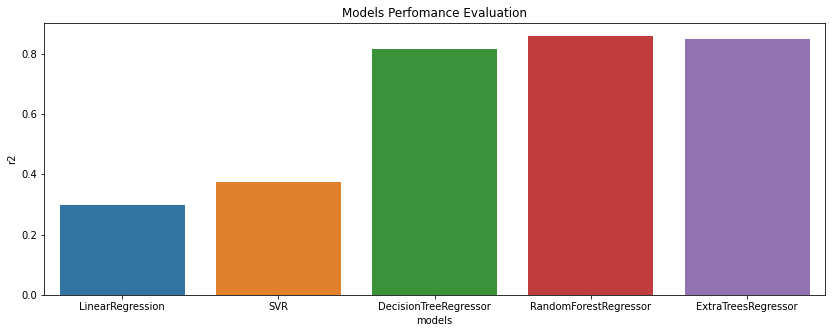

In [48]:
plt.figure(figsize=(14,5))
sns.barplot(data = model_metrics, x = "models" , y = "r2").set(title = "Models Perfomance Evaluation")

saving metrics informations as a **CSV**

---



In [49]:
model_metrics.to_csv("model_metrics_and_scores.csv")

Best Fit model => **Extra Trees Regressor**

---



In [50]:
model = ExtraTreesRegressor()
model.fit(X_train,y_train)
print(f"Train r2 score => {model.score(X_train,y_train)}")
print()
print(f"Test r2 score => {model.score(X_test,y_test)}")

Train r2 score => 0.9735992736943146

Test r2 score => 0.8498315098283227




---



**CONCLUTION :** use ExtraTreesRegressor as model



---



### Hyperparameter tuning

In [27]:
from sklearn.model_selection import GridSearchCV

In [ ]:
gsc = GridSearchCV(
    estimator=model,
    param_grid={
        'n_estimators': range(50,126,25),        
        'min_samples_leaf': range(20,50,5),
        'min_samples_split': range(15,36,5),
    },
    scoring='r2',
    cv=2,
    verbose=2,
    n_jobs=-1 
)

In [ ]:
grid_result = gsc.fit(X_train, y_train)

Fitting 2 folds for each of 120 candidates, totalling 240 fits


In [ ]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.554125 using {'min_samples_leaf': 20, 'min_samples_split': 25, 'n_estimators': 125}


In [ ]:
model = ExtraTreesRegressor(**grid_result.best_params_)

In [ ]:
print(model)

ExtraTreesRegressor(min_samples_leaf=20, min_samples_split=25, n_estimators=125)


In [ ]:
model.fit(X_train,y_train)

ExtraTreesRegressor(min_samples_leaf=20, min_samples_split=25, n_estimators=125)

In [ ]:
model.score(X_train,y_train)

0.6602629849927832

In [ ]:
model.score(X_test,y_test)

0.6291045490645846

* while hyperparameter turning we came to know that the **default hyperparameters** of the model gives **BEST PERFOMANCE** :)

### Save Models and Normalizers

In [51]:
import pickle

## save model
output = open('model.pkl', 'wb')
pickle.dump(model, output)
output.close()

##save normalizer
output = open('normalizer.pkl', 'wb')
pickle.dump(sc, output)
output.close()
